## fetching and preparing datasets for EDA and feature selection

In [270]:
import wget
import pandas as pd
import numpy as np
import requests
import os
from  datetime import *
import sys
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.naive_bayes import GaussianNB
import scipy
import matplotlib
import tensorflow
import tf_utils
import keras
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)


In [30]:
# making a list of the data frame names obtained from dictionary above
list_df_names = []
for df_name in ph1_urls.keys():
    list_df_names.append(df_name)


In [62]:
# download files and name them by list of df names from dictionary
url_order = 0
for url in ph1_urls.values():
    wget.download(url, list_df_names[url_order] + ".tsv")
    url_order += 1

In [73]:
#  make a list of the data tables
df_tsv_list = []
url_order = 0

for names in list_df_names:
    df_tsv = pd.read_table(list_df_names[url_order] + ".tsv")
    df_tsv_list.append(df_tsv)
    url_order += 1   

In [76]:
# writing the 
sc1_GE_outcome = df_tsv_list[0]
sc1_GE_phenotype = df_tsv_list[1]
sc1_GE_featuremat = df_tsv_list[2]
sc2_CN_outcome = df_tsv_list[3]
sc2_CN_phenotype = df_tsv_list[4]
sc2_CN_featuremat = df_tsv_list[5]
sc3_GE_outcome = df_tsv_list[6]
sc3_GE_phenotype = df_tsv_list[7]
sc3_GE_featuremat = df_tsv_list[8]

['sc1_GE_outcome',
 'sc1_GE_phenotype',
 'sc1_GE_featuremat',
 'sc2_CN_outcome',
 'sc2_CN_phenotype',
 'sc2_CN_featuremat',
 'sc3_GE_outcome',
 'sc3_GE_phenotype',
 'sc3_GE_featuremat']

In [105]:
# EDA
sc1_GE_outcome.SURVIVAL_STATUS.sum()  # 326
sc1_GE_featuremat

,PATIENTID,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,patient_290,6.557793,6.453623,5.302909,12.530607,6.082401,5.667769,6.764585,6.094459,6.240895,...,7.338461,8.616562,6.587933,6.034539,7.525232,5.847143,9.426022,10.027414,8.438376,8.853557
1,patient_394,6.323015,6.305724,5.552097,13.000489,6.263721,5.347906,6.723860,6.143284,6.256355,...,8.138918,9.463643,6.233711,6.174691,8.169813,5.988549,9.988564,11.577409,8.672737,9.205295
2,patient_81,6.669421,6.414214,5.478774,12.545510,5.940785,5.639510,6.752736,6.001829,6.148274,...,7.754430,9.229166,6.288666,5.957426,8.148327,6.190679,9.531540,11.180062,8.484453,8.856021
3,patient_307,6.502573,6.508156,5.648495,12.407083,6.414991,5.493800,6.912802,6.072980,6.318908,...,6.582457,8.851282,6.672033,6.194203,7.576931,6.422759,9.057685,10.062035,8.508903,7.742661
4,patient_14,6.624505,6.911232,5.614099,10.777103,6.236386,5.512900,7.178968,6.088447,6.091908,...,7.176397,7.618780,6.086676,6.096177,7.251395,6.090243,10.298209,9.443150,8.204315,8.606522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,patient_586,6.344885,7.004975,5.804589,11.338722,6.929918,5.686911,7.256925,6.058814,6.414383,...,7.368285,8.867476,6.238630,5.957348,7.831731,6.530658,8.815291,9.185908,8.470488,8.670005
373,patient_22,6.879257,6.475546,5.404566,13.971154,6.361109,5.350987,6.612382,6.056349,6.252476,...,8.173071,9.031013,6.180067,6.030185,7.397812,6.132492,9.081442,10.272506,8.322548,9.013977
374,patient_202,7.070734,6.458277,5.490874,13.392288,6.268895,5.350325,6.846159,5.956444,6.225297,...,7.937763,9.245334,6.068505,6.083121,7.129461,6.114066,9.096826,11.026130,8.106846,8.516612
375,patient_497,7.392832,6.965250,5.424097,12.614858,5.991026,5.441065,7.031373,6.044351,5.988191,...,8.090522,8.971800,6.240913,6.212777,7.762401,6.297594,9.346430,11.267400,8.512175,8.952521


Merging features and labels

In [285]:
# sc1 joining the data frames on patientid
sc1_GE_outcome_featuremat = pd.merge(sc1_GE_outcome, sc1_GE_featuremat,  # join the data frames
                                       on = 'PATIENTID') # on 
# write to csv
#sc1_GE_outcome_featuremat.to_csv("input.csv").

NameError: name 'sc1_GE_outcome' is not defined

In [2]:
# read test input
df = pd.read_csv("input.csv")
df.drop(df.columns[0], inplace = True, axis = 1)

In [3]:
df

,PATIENTID,SURVIVAL_STATUS,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,patient_290,1,6.557793,6.453623,5.302909,12.530607,6.082401,5.667769,6.764585,6.094459,...,7.338461,8.616562,6.587933,6.034539,7.525232,5.847143,9.426022,10.027414,8.438376,8.853557
1,patient_394,1,6.323015,6.305724,5.552097,13.000489,6.263721,5.347906,6.723860,6.143284,...,8.138918,9.463643,6.233711,6.174691,8.169813,5.988549,9.988564,11.577409,8.672737,9.205295
2,patient_81,1,6.669421,6.414214,5.478774,12.545510,5.940785,5.639510,6.752736,6.001829,...,7.754430,9.229166,6.288666,5.957426,8.148327,6.190679,9.531540,11.180062,8.484453,8.856021
3,patient_307,1,6.502573,6.508156,5.648495,12.407083,6.414991,5.493800,6.912802,6.072980,...,6.582457,8.851282,6.672033,6.194203,7.576931,6.422759,9.057685,10.062035,8.508903,7.742661
4,patient_14,1,6.624505,6.911232,5.614099,10.777103,6.236386,5.512900,7.178968,6.088447,...,7.176397,7.618780,6.086676,6.096177,7.251395,6.090243,10.298209,9.443150,8.204315,8.606522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,patient_586,0,6.344885,7.004975,5.804589,11.338722,6.929918,5.686911,7.256925,6.058814,...,7.368285,8.867476,6.238630,5.957348,7.831731,6.530658,8.815291,9.185908,8.470488,8.670005
373,patient_22,1,6.879257,6.475546,5.404566,13.971154,6.361109,5.350987,6.612382,6.056349,...,8.173071,9.031013,6.180067,6.030185,7.397812,6.132492,9.081442,10.272506,8.322548,9.013977
374,patient_202,1,7.070734,6.458277,5.490874,13.392288,6.268895,5.350325,6.846159,5.956444,...,7.937763,9.245334,6.068505,6.083121,7.129461,6.114066,9.096826,11.026130,8.106846,8.516612
375,patient_497,1,7.392832,6.965250,5.424097,12.614858,5.991026,5.441065,7.031373,6.044351,...,8.090522,8.971800,6.240913,6.212777,7.762401,6.297594,9.346430,11.267400,8.512175,8.952521


In [3]:
# shuffle input to obtain more splitting points

def shuffle_df(n):
    """
    Generate "n" randomly shuffled instance of input data frame :
    - in csv format & - named "input.csv"
    input  : input.csv
    output : tuple with size 2 containing:
             df_list_seed: list of shuffling seeds
             df_list: list of shuffled data frames
    """

    # read the input file
    #df = pd.read_csv("input.csv")
    df_indexed = df.set_index('PATIENTID')

    # generate random seed using current time
    now = datetime.now()
    initial_seed = int(now. strftime("%H%M%S%f"))
    seed = initial_seed // 1000000000

    # generate n data frames/seeds and add them to a list
    df_list = {}
    df_list_seed = {}
    for i in range(n):
        random_state_seed = seed + i
        df_shuffle = df_indexed.sample(frac = 1, # shuffle keeping total number of rows
                                       random_state = random_state_seed)
        df_list[i] = df_shuffle
        df_list_seed[i] = random_state_seed

    return df_list_seed, df_list



In [258]:
# pick one dataframe allowing user to enter key of dataframe
# user can only enter digits 0 - 9

## make this as a function  
df_n = -1 # could be any value outside of accepted range

tries = 0
while not  0 <= df_n <= 99:
    try:
        df_n = int(input("Please enter a digit (0 - 99) : "))
    except ValueError:
        print("wrong input format")
    tries += 1
    if tries > 3:
        print("Too many invalid inputs, exiting.....")
        sys.exit()


Please enter a digit (0 - 99) : 0


In [259]:
# passing user value to pick shuffled data set
input_shuffled = shuffle_df(100)[1][df_n] # picking n = 10 to shuffle 10 times


In [29]:
#input_shuffled_wilcox_100, seed 4

,SURVIVAL_STATUS,CHODL,GMPR2,EIF3E,HAUS4,ZNF32,RRNAD1,UBXN1,PCMTD1,PLAT,...,RABGAP1,SLC25A21.AS1,EXD3,MED12,HNRNPH3,MCEE,CPSF7,SAT2,SLC38A11,LOC101928961
PATIENTID,,,,,,,,,,,,,,,,,,,,,
patient_540,1,6.205657,9.422060,10.938851,8.468882,9.314803,7.806849,7.727426,7.925435,9.899968,...,9.905865,4.668822,6.383251,8.852478,10.140455,7.168284,10.720685,11.571303,8.241681,4.807024
patient_453,1,9.986536,8.861032,10.956120,8.436593,8.767719,7.544797,7.521510,8.322603,9.538145,...,10.211596,4.683592,6.782874,8.197749,9.349891,6.936185,10.619328,10.820085,6.325793,4.918598
patient_438,1,6.146748,9.664089,10.299545,8.769872,9.319660,7.828449,7.541909,7.790946,10.559274,...,10.441759,4.761501,6.848328,8.630073,10.050110,6.750347,10.745832,11.476839,5.665453,4.853356
patient_330,1,6.372243,9.104670,10.788650,8.235344,8.404054,7.505733,7.481022,8.356427,10.087811,...,9.264585,4.658914,6.696115,8.266943,9.301238,6.667824,10.448103,10.863884,7.331144,4.972457
patient_541,1,6.409208,9.276586,11.707624,9.202066,9.777698,7.949360,8.041957,8.776899,6.918689,...,10.720649,6.102748,7.124993,9.064560,10.052046,7.241194,10.618974,11.038003,5.899344,4.982265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient_384,1,6.384332,9.393954,11.163397,8.192123,9.746123,7.865212,7.963678,8.978258,7.038432,...,11.706243,5.652195,7.572017,8.814884,10.320506,7.240780,10.829891,10.921455,5.616653,5.016305
patient_218,1,6.247027,9.364802,11.140109,8.875920,9.027706,7.624842,7.369538,8.010142,10.665402,...,9.989417,4.771214,6.885333,8.651626,9.481679,6.858326,9.814983,11.061958,6.622952,4.944867
patient_525,1,6.329893,9.121354,10.866168,8.658375,8.952183,7.418291,7.717149,8.420371,10.940642,...,10.429953,4.752343,6.719344,8.551868,9.452013,7.043254,10.602445,10.740790,6.173022,4.950270


In [219]:
def split_prep(train_frac, input_shuffled):
    """
    Prepare shuffled instance of input dataset for training and testing.

    input:    value of fraction of rows for training
              input dataset 
    output:   tuple of lists of arrays in this order:
              hold_out (as external dataset, if model performance was optimized during testing)
              testing
              training
    """
    

    ## subsetting the training and testing sets in row-number ordering: hold_out, testing, training
    #  get the number of rows for testing to define the boudnds of testing/training rows
    test_end = int(input_shuffled.shape[0] -
                   input_shuffled.shape[0] * train_frac)

    #  split non_training rows in half into testing and hold_out
    ##### make a function to clean up try calling in panda
    #  get per group a list of numpy arrays of features and labels
    # hold_out
 

    # testing
    testing = []
    testing_Y =  np.array(input_shuffled.iloc[0 : test_end, 0])
    testing_X =  np.array(input_shuffled.iloc[0 : test_end, 1:])
    testing.append(testing_X)
    testing.append(testing_Y)

    # training
    training = []
    training_Y = np.array(input_shuffled.iloc[test_end : -1 , 0])
    training_X = np.array(input_shuffled.iloc[test_end : -1 , 1:])
    training.append(training_X)
    training.append(training_Y)

    return testing, training



In [221]:
### Model building
## Data prep
# Get train and test datasets with split ratio 8:1:1. Smaller training portions showed less predictive power.
# train
X_train = split_prep(0.8, input_shuffled)[1][0]
Y_train = split_prep(0.8,input_shuffled)[1][1]
# test
X_test = split_prep(0.8,input_shuffled)[0][0]
Y_test = split_prep(0.8,input_shuffled)[0][1]


#encoding
encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y = encoder_train.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y)
##

# encode class values as integers
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)
## Algorithm : RandomForest was selected to act as null hypothesis tester
# Implementing 5-fold cross validation

skfolds5 = StratifiedKFold(n_splits = 5) # use stratified method to address label imbalance

# initializing and instantiating
rf = RandomForestClassifier()
Balanced_accuracy_CV = 0
Pos_accuracy_CV = 0

# loop through the splits and get train and test subsets
for train_index, test_index in skfolds5.split(X_train, Y_train):
    clone_rf = clone(rf)
    X_train_folds = X_train[train_index]
    y_train_folds = Y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = Y_train[test_index]

    # train and test in the split clone and
    # print predictive performance: balanced accuracy and specifically True-label prediction
    clone_rf.fit(X_train_folds, y_train_folds)
    y_pred = clone_rf.predict(X_test_fold)
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).flatten()
    # performance metrics
    BA = (tp/(tp+fn) + tn/(tn+fp))/2
    Balanced_accuracy_CV += BA
    PA = tn/(tn+fp)
    Pos_accuracy_CV += PA
    print("Balanced accuracy = ", round(BA, 3))
    print("Positive space accuracy = ", round(PA, 3))
    y_pred = clone_rf.predict(X_test_fold)

print("Average balanced accuracy = ", round(Balanced_accuracy_CV/5, 3))
print("Average death accuracy = ", round(Pos_accuracy_CV/5, 3))


Balanced accuracy =  0.5
Positive space accuracy =  0.0
Balanced accuracy =  0.481
Positive space accuracy =  0.0
Balanced accuracy =  0.5
Positive space accuracy =  0.0
Balanced accuracy =  0.5
Positive space accuracy =  0.0
Balanced accuracy =  0.562
Positive space accuracy =  0.125
Average balanced accuracy =  0.509
Average death accuracy =  0.025


In [222]:

# initializing and instantiating
#Create a Gaussian Classifier
model = GaussianNB()

Balanced_accuracy_CV = 0
Pos_accuracy_CV = 0
skfolds5 = StratifiedKFold(n_splits = 5) # use stratified method to address label imbalance

# loop through the splits and get train and test subsets
for train_index, test_index in skfolds5.split(X_train, Y_train):
    clone_gnb = clone(model)
    X_train_folds = X_train[train_index]
    y_train_folds = Y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = Y_train[test_index]

    # train and test in the split clone and
    # print predictive performance: balanced accuracy and specifically True-label prediction
    clone_gnb.fit(X_train_folds, y_train_folds)
    y_pred = clone_gnb.predict(X_test_fold)
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).flatten()
    # performance metrics
    BA = (tp/(tp+fn) + tn/(tn+fp))/2
    Balanced_accuracy_CV += BA
    PA = tn/(tn+fp)
    Pos_accuracy_CV += PA
    print("Balanced accuracy = ", round(BA, 3))
    print("Positive space accuracy = ", round(PA, 3))

    
print("Average balanced accuracy = ", round(BA, 5))
print("Average death accuracy = ", round(Pos_accuracy_CV/5, 5))

Balanced accuracy =  0.612
Positive space accuracy =  0.375
Balanced accuracy =  0.611
Positive space accuracy =  0.375
Balanced accuracy =  0.476
Positive space accuracy =  0.125
Balanced accuracy =  0.486
Positive space accuracy =  0.125
Balanced accuracy =  0.558
Positive space accuracy =  0.25
Average balanced accuracy =  0.55769
Average death accuracy =  0.25


In [223]:
from sklearn.naive_bayes import ComplementNB
#Create a Gaussian Classifier
model = ComplementNB()

Balanced_accuracy_CV = 0
Pos_accuracy_CV = 0
skfolds5 = StratifiedKFold(n_splits = 5) # use stratified method to address label imbalance

# loop through the splits and get train and test subsets
for train_index, test_index in skfolds5.split(X_train, Y_train):
    clone_gnb = clone(model)
    X_train_folds = X_train[train_index]
    y_train_folds = Y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = Y_train[test_index]

    # train and test in the split clone and
    # print predictive performance: balanced accuracy and specifically True-label prediction
    clone_gnb.fit(X_train_folds, y_train_folds)
    y_pred = clone_gnb.predict(X_test_fold)
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).flatten()
    # performance metrics
    print(confusion_matrix(y_test_fold, y_pred))
    PA = tn/(tn+fp)
    Pos_accuracy_CV += PA
    print("Death accuracy = ", round(PA, 3))
    print(Pos_accuracy_CV/5)

print("Average death accuracy = ", round(Pos_accuracy_CV/5, 5))

[[ 5  3]
 [16 37]]
Death accuracy =  0.625
0.125
[[ 5  3]
 [22 30]]
Death accuracy =  0.625
0.25
[[ 3  5]
 [19 33]]
Death accuracy =  0.375
0.325
[[ 3  5]
 [14 38]]
Death accuracy =  0.375
0.4
[[ 2  6]
 [12 40]]
Death accuracy =  0.25
0.45
Average death accuracy =  0.45


In [224]:
# calcualte pval Wilcoxon Rank Sum
# split into two data frames then arrays
input_shuffled_survive = input_shuffled[(input_shuffled['SURVIVAL_STATUS'] == 1)]
input_shuffled_die = input_shuffled[(input_shuffled['SURVIVAL_STATUS'] == 0)]


In [225]:
pval_sc1 = []
for i in range(2, input_shuffled_survive.shape[1]):
    pval = scipy.stats.ranksums(input_shuffled_survive.iloc[:, i],
                         input_shuffled_die.iloc[:, i]).pvalue
    pval_sc1.append(pval)
# 

In [49]:
input_shuffled_survive_columns = []
for col in input_shuffled_survive.columns[2:]:
    input_shuffled_survive_columns.append(col)

In [50]:
pval_sc1_genes_df = pd.DataFrame(pval_sc1, index =input_shuffled_survive_columns, 
                                              columns =['wilcox_rank_pval']) 

In [51]:
pval_sc1_genes_df_sorted = pval_sc1_genes_df.sort_values(by=['wilcox_rank_pval'])

In [52]:
genes_top_100 = pval_sc1_genes_df_sorted.iloc[:100, :].index
wilcox_top_100_feat = []
for gene in genes_top_100:
    wilcox_top_100_feat.append(gene)

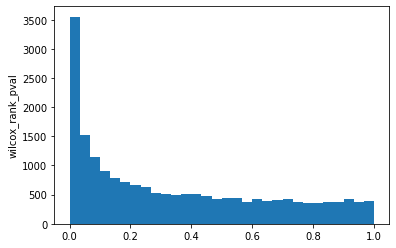

In [53]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.random.normal(size = 1000)
plt.hist(pval_sc1_genes_df_sorted['wilcox_rank_pval'], bins=30)
plt.ylabel('wilcox_rank_pval');

In [230]:
new_cols = genes_top_100
new_cols = new_cols.insert(0, 'SURVIVAL_STATUS') 


In [231]:
#new_cols = new_cols[0:50]

In [262]:
input_shuffled_top_100 = input_shuffled[new_cols]

In [273]:
genes_top_100

Index(['CHODL', 'GMPR2', 'EIF3E', 'HAUS4', 'ZNF32', 'RRNAD1', 'UBXN1',
       'PCMTD1', 'PLAT', 'RASSF4', 'POLL', 'UBR5', 'ZSWIM8', 'SAFB2', 'ULBP2',
       'GRB14', 'ANAPC16', 'CASTOR1', 'KLHDC2', 'SHC2', 'CLNS1A', 'MTHFD2',
       'SMARCC2', 'CLK1', 'PARD3', 'SCRN2', 'ARNTL2', 'ASB3', 'UBE2NL',
       'LBHD1', 'EIF3H', 'EBF4', 'DDX59', 'MARCH8', 'PPWD1', 'CNBP', 'TMEM175',
       'RPL30', 'CSKMT', 'EAPP', 'CUL9', 'SNHG19', 'NACA2', 'CIR1', 'ZSWIM7',
       'CCS', 'RPL23', 'APC2', 'GOLGB1', 'BTAF1', 'HEXDC', 'RPS14', 'SF3A1',
       'ZDHHC6', 'ACBD4', 'RPL5', 'FGF22', 'RPL4', 'OR51E1', 'ACRBP',
       'SLC36A4', 'TIAL1', 'GABARAP', 'PDCD4', 'MST1', 'USP54', 'GCDH',
       'PRDM11', 'SYCP2', 'PNN', 'CTBP2', 'UBAC1', 'DICER1.AS1', 'NRN1',
       'SIRT1', 'ZNF665', 'STC1', 'DLG5', 'RANGRF', 'NCOA4', 'LINC01116',
       'ESM1', 'CCDC185', 'NSUN6', 'HIBCH', 'CREBBP', 'RBM17', 'CIRBP',
       'EGFL6', 'SPSB3', 'RABGAP1', 'SLC25A21.AS1', 'EXD3', 'MED12', 'HNRNPH3',
       'MCEE', 'CPSF7', 'S

In [263]:
X_train = split_prep(0.8, input_shuffled_top_100)[1][0]
Y_train = split_prep(0.8,input_shuffled_top_100)[1][1]
# test
X_test = split_prep(0.8,input_shuffled_top_100)[0][0]
Y_test = split_prep(0.8,input_shuffled_top_100)[0][1]


In [250]:
Y_test.shape[0]

75

In [243]:
75/0.2

375.0

In [264]:
### Model building
## Data prep
# Get train and test datasets with split ratio 8:1:1. Smaller training portions showed less predictive power.
# train


## Algorithm : RandomForest was selected to act as null hypothesis tester
# Implementing 5-fold cross validation

skfolds5 = StratifiedKFold(n_splits = 5) # use stratified method to address label imbalance

# initializing and instantiating
rf = RandomForestClassifier()
Balanced_accuracy_CV = 0
Pos_accuracy_CV = 0

# loop through the splits and get train and test subsets
for train_index, test_index in skfolds5.split(X_train, Y_train):
    clone_rf = clone(rf)
    X_train_folds = X_train[train_index]
    y_train_folds = Y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = Y_train[test_index]

    # train and test in the split clone and
    # print predictive performance: balanced accuracy and specifically True-label prediction
    clone_rf.fit(X_train_folds, y_train_folds)
    y_pred = clone_rf.predict(X_test_fold)
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).flatten()
    # performance metrics
    BA = (tp/(tp+fn) + tn/(tn+fp))/2
    Balanced_accuracy_CV += BA
    PA = tn/(tn+fp)
    Pos_accuracy_CV += PA
    print("Balanced accuracy = ", round(BA, 3))
    print("Positive space accuracy = ", round(PA, 3))
    y_pred = clone_rf.predict(X_test_fold)

print("Average balanced accuracy = ", round(Balanced_accuracy_CV/5, 3))
print("Average death accuracy = ", round(Pos_accuracy_CV/5, 3))


Balanced accuracy =  0.7
Positive space accuracy =  0.4
Balanced accuracy =  0.712
Positive space accuracy =  0.444
Balanced accuracy =  0.601
Positive space accuracy =  0.222
Balanced accuracy =  0.55
Positive space accuracy =  0.1
Balanced accuracy =  0.59
Positive space accuracy =  0.2
Average balanced accuracy =  0.631
Average death accuracy =  0.273


In [265]:

# initializing and instantiating
#Create a Gaussian Classifier
model = GaussianNB()

Balanced_accuracy_CV = 0
Pos_accuracy_CV = 0
skfolds5 = StratifiedKFold(n_splits = 5) # use stratified method to address label imbalance

# loop through the splits and get train and test subsets
for train_index, test_index in skfolds5.split(X_train, Y_train):
    clone_gnb = clone(model)
    X_train_folds = X_train[train_index]
    y_train_folds = Y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = Y_train[test_index]

    # train and test in the split clone and
    # print predictive performance: balanced accuracy and specifically True-label prediction
    clone_gnb.fit(X_train_folds, y_train_folds)
    y_pred = clone_gnb.predict(X_test_fold)
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).flatten()
    # performance metrics
    BA = (tp/(tp+fn) + tn/(tn+fp))/2
    Balanced_accuracy_CV += BA
    PA = tn/(tn+fp)
    Pos_accuracy_CV += PA
    print("Balanced accuracy = ", round(BA, 3))
    print("Positive space accuracy = ", round(PA, 3))

    
print("Average balanced accuracy = ", round(BA, 5))
print("Average death accuracy = ", round(Pos_accuracy_CV/5, 5))

Balanced accuracy =  0.722
Positive space accuracy =  0.6
Balanced accuracy =  0.761
Positive space accuracy =  0.778
Balanced accuracy =  0.706
Positive space accuracy =  0.667
Balanced accuracy =  0.61
Positive space accuracy =  0.4
Balanced accuracy =  0.64
Positive space accuracy =  0.4
Average balanced accuracy =  0.64
Average death accuracy =  0.56889


In [266]:

# initializing and instantiating
#Create a Gaussian Classifier
model = ComplementNB()

Balanced_accuracy_CV = 0
Pos_accuracy_CV = 0
skfolds5 = StratifiedKFold(n_splits = 5) # use stratified method to address label imbalance

# loop through the splits and get train and test subsets
for train_index, test_index in skfolds5.split(X_train, Y_train):
    clone_gnb = clone(model)
    X_train_folds = X_train[train_index]
    y_train_folds = Y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = Y_train[test_index]

    # train and test in the split clone and
    # print predictive performance: balanced accuracy and specifically True-label prediction
    clone_gnb.fit(X_train_folds, y_train_folds)
    y_pred = clone_gnb.predict(X_test_fold)
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).flatten()
    # performance metrics
    BA = (tp/(tp+fn) + tn/(tn+fp))/2
    Balanced_accuracy_CV += BA
    PA = tn/(tn+fp)
    Pos_accuracy_CV += PA
    print("Balanced accuracy = ", round(BA, 3))
    print("Positive space accuracy = ", round(PA, 3))

    
print("Average balanced accuracy = ", round(BA, 5))
print("Average death accuracy = ", round(Pos_accuracy_CV/5, 5))

Balanced accuracy =  0.713
Positive space accuracy =  0.7
Balanced accuracy =  0.752
Positive space accuracy =  0.778
Balanced accuracy =  0.637
Positive space accuracy =  0.667
Balanced accuracy =  0.62
Positive space accuracy =  0.4
Balanced accuracy =  0.63
Positive space accuracy =  0.5
Average balanced accuracy =  0.63
Average death accuracy =  0.60889


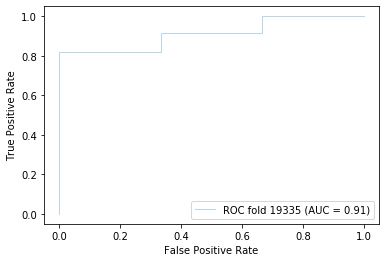

In [284]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clone_gnb, X_test, Y_test ,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1)

In [ ]:
# test sets

In [278]:
accuracy_score(Y_test, y_pred)

0.7333333333333333

In [283]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      1.00      0.23         3
           1       1.00      0.72      0.84        72

    accuracy                           0.73        75
   macro avg       0.57      0.86      0.53        75
weighted avg       0.97      0.73      0.81        75

